# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import matplotlib.pyplot as plt
import numpy as np


## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df = pd.read_csv('../data/checker_submits.csv', parse_dates=['timestamp'])
df

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806


In [3]:
df['hour']= df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.weekday
df = df.drop('timestamp', axis=1)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [4]:
encoder = OneHotEncoder(sparse_output=False)  # array
encoded_data = encoder.fit_transform(df[['labname','uid']]) # array
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['labname', 'uid']))
df = pd.merge(df, encoded_df, left_index=True, right_index=True)
df = df.drop(['labname', 'uid'], axis=1)
df

,numTrials,hour,dayofweek,labname_code_rvw,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,...,uid_user_27,uid_user_28,uid_user_29,uid_user_3,uid_user_30,uid_user_31,uid_user_4,uid_user_6,uid_user_7,uid_user_8
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1682,6,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1683,7,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1684,8,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
scaler = StandardScaler()
df[['numTrials', 'hour']] = scaler.fit_transform(df[['numTrials', 'hour']])
df

,numTrials,hour,dayofweek,labname_code_rvw,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,...,uid_user_27,uid_user_28,uid_user_29,uid_user_3,uid_user_30,uid_user_31,uid_user_4,uid_user_6,uid_user_7,uid_user_8
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1682,-0.629151,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1683,-0.597248,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1684,-0.565345,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.to_csv('dayofweek.csv', index=False)

In [7]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [8]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [9]:
y_pred = dummy.predict(X)
naive_accuracy = accuracy_score(y, y_pred)
naive_accuracy
#0.2348

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [10]:
# нужно ли шкалирование?
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [11]:
model = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
model.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21, solver='liblinear')

In [12]:
model.coef_, model.intercept_, len(model.classes_)

(array([[-1.22363567e-01,  1.38529377e-01, -1.78287956e+00,
          4.93671507e-01,  3.70133803e-01,  3.65713308e-01,
         -1.97893681e+00, -2.04188412e+00, -2.37047672e+00,
         -3.64901354e+00, -2.19387305e+00, -2.32679294e+00,
         -1.68331550e+00,  4.93671507e-01, -1.58373497e+00,
         -1.89930658e+00, -2.65049679e-01, -5.85641354e-01,
         -9.46266784e-01,  3.10984699e-01, -1.00650280e+00,
          1.18684901e-01,  1.74719344e-01,  2.04634186e-01,
         -9.18356864e-01, -2.27904036e-01,  1.68243477e-02,
         -1.40933071e+00,  7.06427631e-01, -2.78986289e-01,
         -1.58942339e+00, -7.76636079e-01, -1.96209647e+00,
         -1.03958636e+00, -1.67542458e+00, -4.95042418e-01,
          9.76741303e-01, -8.99714499e-01, -1.52715717e-01,
         -3.26067051e-01, -1.51389589e-01, -3.66905765e-01,
         -1.24425955e+00],
        [ 3.60511129e-01, -3.61530905e-01, -2.82432428e+00,
         -4.43815612e-01, -2.52370148e-01, -2.41536901e-01,
         -1.7

In [13]:
y_pred = model.predict(X)
model_accuracy = accuracy_score(y, y_pred)
model_accuracy

0.6215895610913404

In [14]:
X.columns

Index(['numTrials', 'hour', 'labname_code_rvw', 'labname_lab02',
       'labname_lab03', 'labname_lab03s', 'labname_lab05s', 'labname_laba04',
       'labname_laba04s', 'labname_laba05', 'labname_laba06',
       'labname_laba06s', 'labname_project1', 'uid_user_0', 'uid_user_1',
       'uid_user_10', 'uid_user_11', 'uid_user_12', 'uid_user_13',
       'uid_user_14', 'uid_user_15', 'uid_user_16', 'uid_user_17',
       'uid_user_18', 'uid_user_19', 'uid_user_2', 'uid_user_20',
       'uid_user_21', 'uid_user_22', 'uid_user_23', 'uid_user_24',
       'uid_user_25', 'uid_user_26', 'uid_user_27', 'uid_user_28',
       'uid_user_29', 'uid_user_3', 'uid_user_30', 'uid_user_31', 'uid_user_4',
       'uid_user_6', 'uid_user_7', 'uid_user_8'],
      dtype='object')

In [15]:
def draw_barh(coefs, names, top_n):
    importance = np.sum(np.abs(coefs), axis=0)
    feature_importance = pd.DataFrame({'feature': names,'importance': importance, 'avg_coef': np.mean(coefs, axis=0)})
    top_features = feature_importance.sort_values('importance', ascending=False).head(top_n)
    
    plt.figure(figsize=(15, 8))
    y_pos = np.arange(len(top_features))
    

    colors = ['green' if x > 0 else 'red' for x in top_features['avg_coef']]
    bars = plt.barh(top_features['feature'], top_features['importance'],color=colors)

    max_val = top_features['importance'].max()
    plt.xlim(0, max_val * 1.1)

    plt.yticks(y_pos, top_features['feature'])
    plt.title('Top Features')
    plt.xlabel("Coefficient Value")
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f"{width:.2f}", ha='left', va='center', color='black')
    
    
    plt.tight_layout()
    plt.show()
    print(top_features)

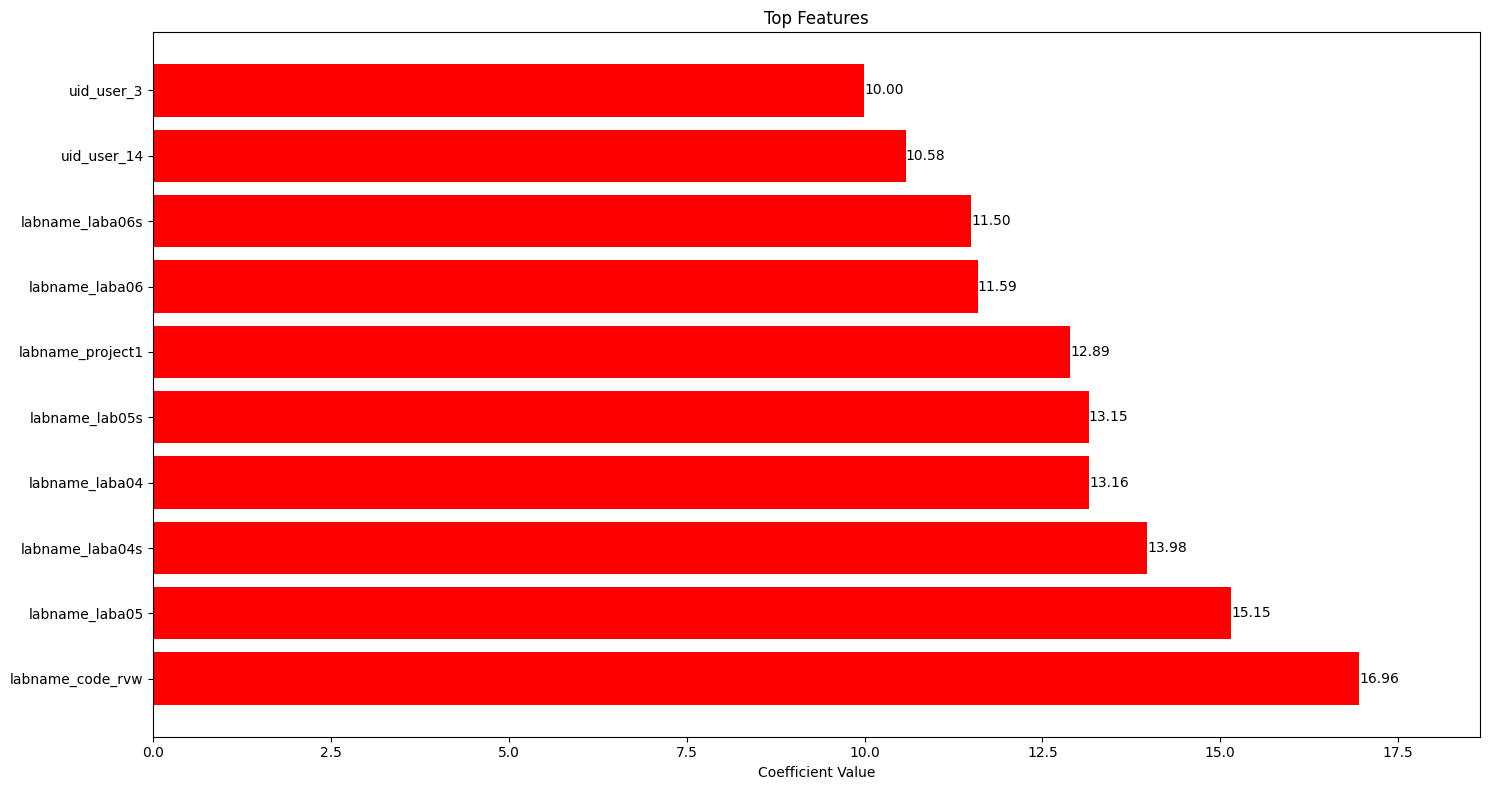

             feature  importance  avg_coef
2   labname_code_rvw   16.955465 -2.000634
9     labname_laba05   15.151363 -2.091373
8    labname_laba04s   13.976324 -1.868557
7     labname_laba04   13.159796 -1.879971
6     labname_lab05s   13.150604 -1.597819
12  labname_project1   12.893510 -1.811659
10    labname_laba06   11.592341 -1.656049
11   labname_laba06s   11.497528 -1.642504
19       uid_user_14   10.577284 -0.723686
36        uid_user_3    9.996832 -0.550461


In [16]:
draw_barh(model.coef_, X.columns, 10)

In [17]:
# Test case
#test_coefs = np.array([[1.0, -2.0, 3.0], [-1.5, 3.0, -0.5]])  # 2 classes, 3 features
#test_names = ['Feature A', 'Feature B', 'Feature C']
#draw_barh(test_coefs, test_names, 3)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [18]:
base_model = SVC (kernel='linear', probability=True, random_state=21)
base_model.fit(X, y)

SVC(kernel='linear', probability=True, random_state=21)

In [19]:
pred = base_model.predict(X)
linear_accuracy = accuracy_score(y, pred)
linear_accuracy

0.702846975088968

In [20]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_acc = 0
for kernel in kernels:
    model = SVC(kernel=kernel, probability=True, random_state=21)
    model.fit(X,y)
    pred = model.predict(X)
    accuracy = accuracy_score(y, pred)
    print(f"Accuracy for {kernel} kernel is {accuracy:.4f}")
    if accuracy > best_acc:
        best_acc = accuracy
print(f"The best is {best_acc:.4f}")

Accuracy for linear kernel is 0.7028
Accuracy for poly kernel is 0.8594
Accuracy for rbf kernel is 0.8559
Accuracy for sigmoid kernel is 0.3998
The best is 0.8594


In [21]:
base_model= OneVsRestClassifier(SVC(kernel='linear', probability = False, random_state=21))
base_model.fit(X, y)

OneVsRestClassifier(estimator=SVC(kernel='linear', random_state=21))

In [22]:
# для каждой SVC модели достаем коэфф
coefs = np.array([estimator.coef_ for estimator in base_model.estimators_])
coefs = coefs.reshape(-1, coefs.shape[-1])
coefs

array([[-8.04643470e-05, -2.49697927e-05, -3.51391944e-01,
         8.10518209e-01,  1.00000000e+00,  1.00000000e+00,
        -3.51338370e-01, -3.51234629e-01, -3.51328378e-01,
        -3.51455157e-01, -3.51465894e-01, -3.51212293e-01,
        -3.51091545e-01,  8.10518209e-01, -2.80315883e-02,
        -2.79633549e-02, -2.83243944e-02, -2.79507653e-02,
        -2.78350934e-02, -2.78615326e-02, -2.78946191e-02,
        -2.78766521e-02, -2.76486422e-02, -2.79338757e-02,
        -2.79829600e-02, -2.79377838e-02, -2.77388545e-02,
        -2.79109648e-02, -2.76750444e-02, -2.75922012e-02,
        -2.78197616e-02, -2.78746989e-02, -2.84329265e-02,
        -2.80481529e-02, -2.82365941e-02, -2.78588940e-02,
        -2.76611673e-02, -2.78832541e-02, -2.80627492e-02,
        -2.80520890e-02, -2.81845073e-02, -2.82209191e-02,
        -2.80241683e-02],
       [ 9.49476042e-05, -3.46367093e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.56724429e-01, -8.56

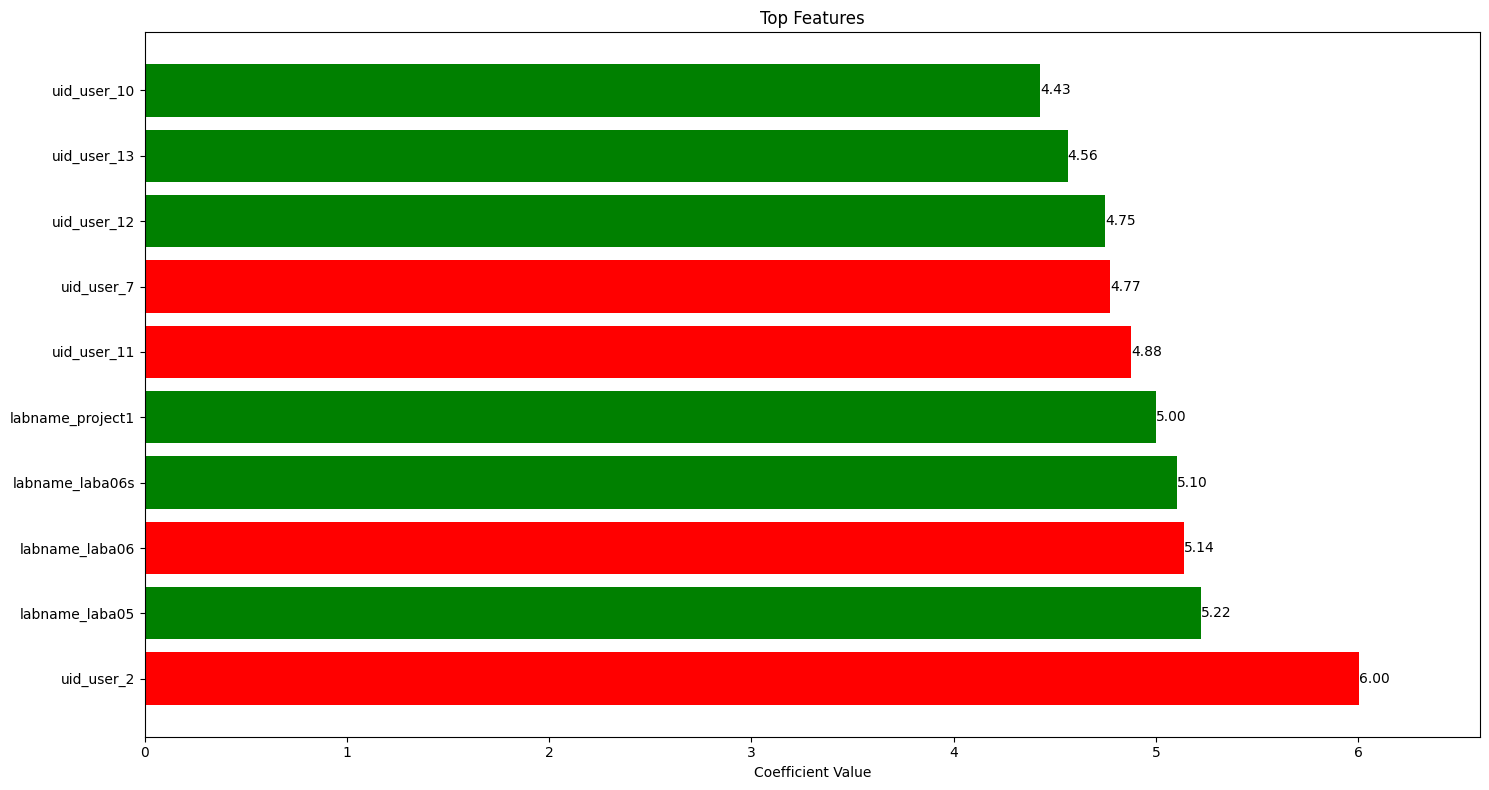

             feature  importance  avg_coef
25        uid_user_2    6.002341 -0.043399
9     labname_laba05    5.224879  0.065579
10    labname_laba06    5.140376 -0.058371
11   labname_laba06s    5.101836  0.099363
12  labname_project1    4.999753  0.249294
16       uid_user_11    4.878303 -0.038359
41        uid_user_7    4.774847 -0.093575
17       uid_user_12    4.748131  0.264975
18       uid_user_13    4.563366  0.249036
15       uid_user_10    4.428438  0.063887


In [23]:
draw_barh(coefs, X.columns, 10)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [24]:
base_model = DecisionTreeClassifier(random_state=21, max_depth = 4)
base_model.fit(X, y)
pred = base_model.predict(X)
accuracy = accuracy_score(y, pred)
accuracy

0.5516014234875445

In [25]:
max_depth = range (1, 11)
max_acc = 0
for d in max_depth:
    model = DecisionTreeClassifier(random_state=21, max_depth = d)
    model.fit(X, y)
    pred = model.predict(X)
    acc = accuracy_score (y, pred)
    print(f"Accuracy for {d} max_depth is {acc:.4f}")
    if acc > max_acc:
        max_acc = acc
print(f"The best accuracy is {max_acc:.4f}")

Accuracy for 1 max_depth is 0.3577
Accuracy for 2 max_depth is 0.4389
Accuracy for 3 max_depth is 0.4899
Accuracy for 4 max_depth is 0.5516
Accuracy for 5 max_depth is 0.6109
Accuracy for 6 max_depth is 0.6637
Accuracy for 7 max_depth is 0.7064
Accuracy for 8 max_depth is 0.7503
Accuracy for 9 max_depth is 0.7847
Accuracy for 10 max_depth is 0.8197
The best accuracy is 0.8197


In [26]:
tree_importances = base_model.feature_importances_
coefs = tree_importances.reshape(1, -1)
tree_importances

array([0.14931603, 0.06154574, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05479407, 0.        , 0.08646791,
       0.        , 0.05629871, 0.27456793, 0.        , 0.        ,
       0.        , 0.        , 0.09837711, 0.        , 0.06455791,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07642063, 0.        , 0.        , 0.        , 0.        ,
       0.01610628, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06154768, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [27]:
coefs

array([[0.14931603, 0.06154574, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05479407, 0.        , 0.08646791,
        0.        , 0.05629871, 0.27456793, 0.        , 0.        ,
        0.        , 0.        , 0.09837711, 0.        , 0.06455791,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07642063, 0.        , 0.        , 0.        , 0.        ,
        0.01610628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.06154768, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

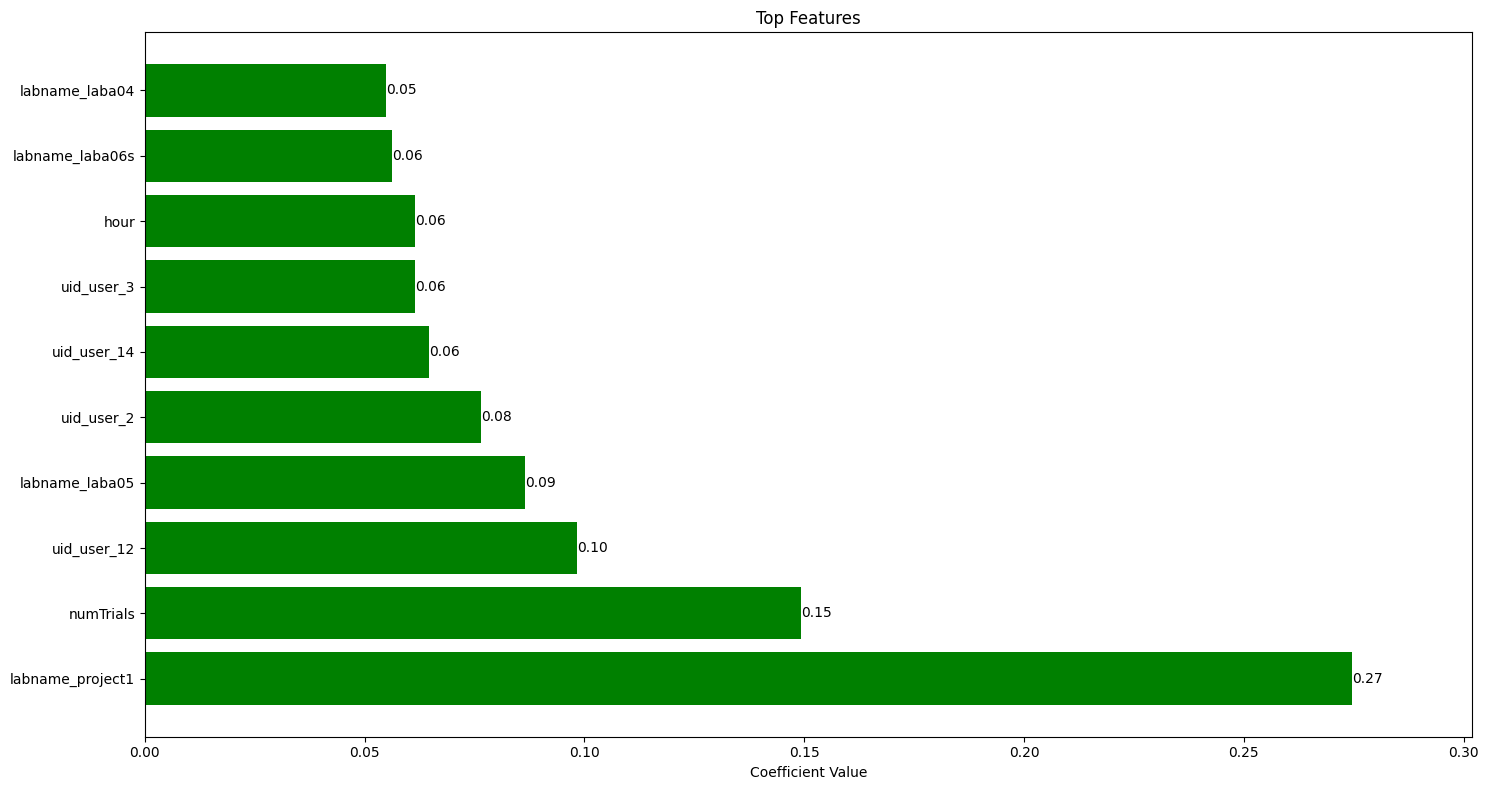

             feature  importance  avg_coef
12  labname_project1    0.274568  0.274568
0          numTrials    0.149316  0.149316
17       uid_user_12    0.098377  0.098377
9     labname_laba05    0.086468  0.086468
25        uid_user_2    0.076421  0.076421
19       uid_user_14    0.064558  0.064558
36        uid_user_3    0.061548  0.061548
1               hour    0.061546  0.061546
11   labname_laba06s    0.056299  0.056299
7     labname_laba04    0.054794  0.054794


In [28]:
draw_barh(coefs, X.columns, 10)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [29]:
base_model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
base_model.fit(X,y)
pred = base_model.predict(X)
base_acc = accuracy_score(y, pred)
base_acc
# 1  потому что мы тренируем и потом оцениваем один и тот же сет данных

1.0

In [30]:
max_depth = range (1, 100, 10)
n_estimators = range (1, 100, 10)
max_acc = 0
for d, n in zip (max_depth, n_estimators):
    model = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=21)
    model.fit(X, y)
    pred = model.predict(X)
    acc = accuracy_score (y, pred)
    print(f"Accuracy for {n, d} n_est, max_depth is {acc:.4f}")
    if acc > max_acc:
        max_acc = acc
print(f"The best accuracy is {max_acc:.4f}")

Accuracy for (1, 1) n_est, max_depth is 0.3577
Accuracy for (11, 11) n_est, max_depth is 0.8826
Accuracy for (21, 21) n_est, max_depth is 0.9958
Accuracy for (31, 31) n_est, max_depth is 1.0000
Accuracy for (41, 41) n_est, max_depth is 1.0000
Accuracy for (51, 51) n_est, max_depth is 1.0000
Accuracy for (61, 61) n_est, max_depth is 1.0000
Accuracy for (71, 71) n_est, max_depth is 1.0000
Accuracy for (81, 81) n_est, max_depth is 1.0000
Accuracy for (91, 91) n_est, max_depth is 1.0000
The best accuracy is 1.0000


In [31]:
importances = base_model.feature_importances_

In [32]:
coefs = importances.reshape(1, -1)

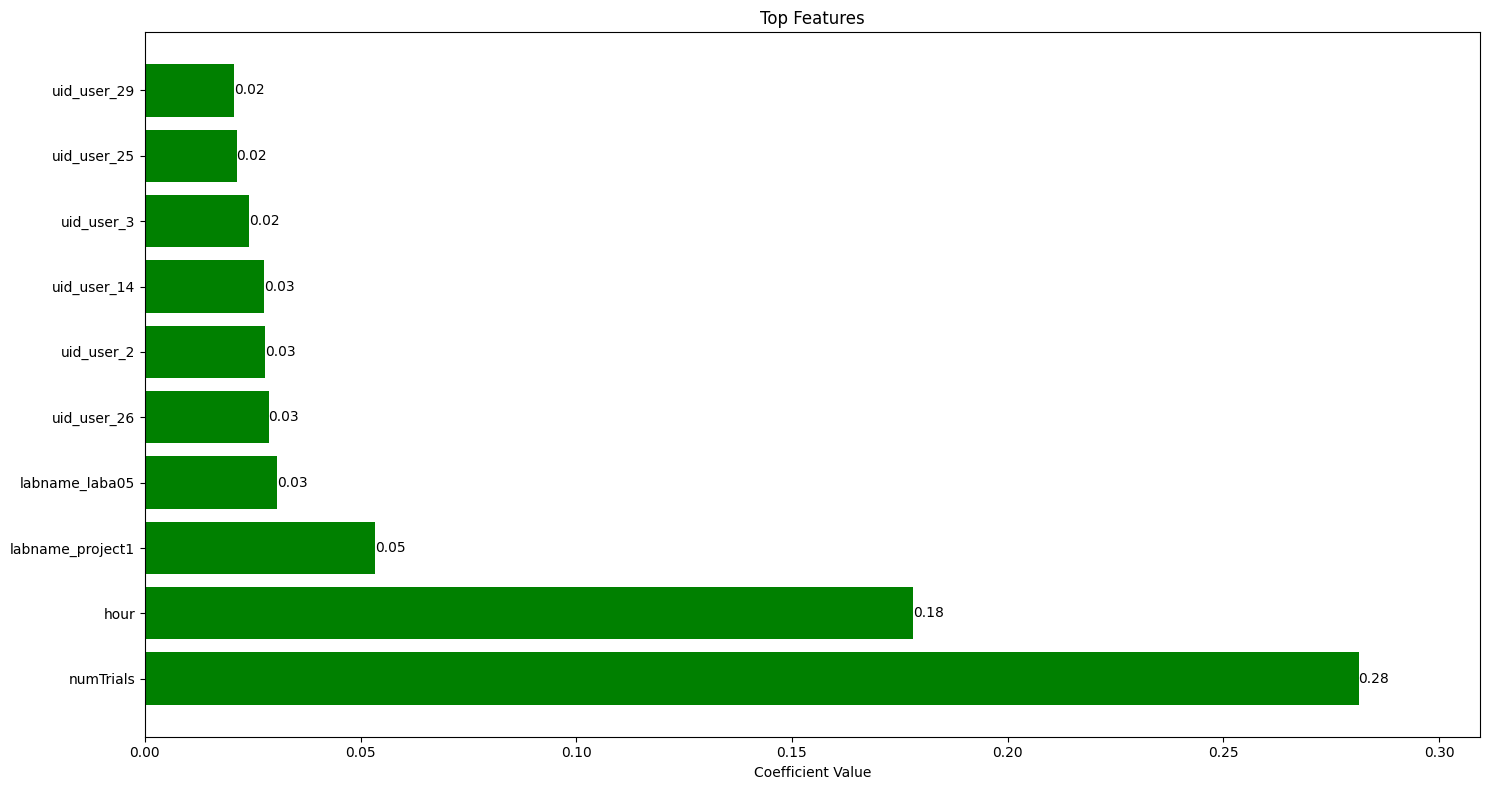

             feature  importance  avg_coef
0          numTrials    0.281340  0.281340
1               hour    0.178096  0.178096
12  labname_project1    0.053268  0.053268
9     labname_laba05    0.030716  0.030716
32       uid_user_26    0.028672  0.028672
25        uid_user_2    0.027892  0.027892
19       uid_user_14    0.027652  0.027652
36        uid_user_3    0.024190  0.024190
31       uid_user_25    0.021268  0.021268
35       uid_user_29    0.020674  0.020674


In [33]:
draw_barh(coefs, X.columns, 10)